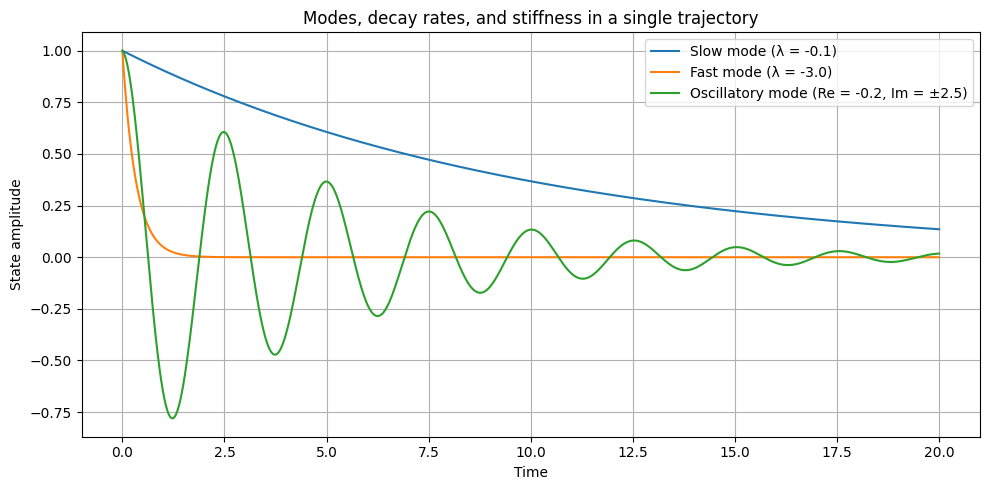

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# System matrix with:
# - slow real mode
# - fast real mode
# - oscillatory mode (2 states)
A = np.array([
    [-0.1,  0.0,  0.0,  0.0],   # slow mode
    [ 0.0, -3.0,  0.0,  0.0],   # fast mode
    [ 0.0,  0.0, -0.2, -2.5],   # oscillatory mode
    [ 0.0,  0.0,  2.5, -0.2]
])

def f(t, x):
    return A @ x

# Initial condition excites all modes
x0 = [1.0, 1.0, 1.0, 0.0]

t_span = (0, 20)
t_eval = np.linspace(0, 20, 2000)

sol = solve_ivp(f, t_span, x0, t_eval=t_eval)

# Extract states
x_slow = sol.y[0]
x_fast = sol.y[1]
x_osc_1 = sol.y[2]
x_osc_2 = sol.y[3]

# Plot
plt.figure(figsize=(10, 5))

plt.plot(t_eval, x_slow, label="Slow mode (λ = -0.1)")
plt.plot(t_eval, x_fast, label="Fast mode (λ = -3.0)")
plt.plot(t_eval, x_osc_1, label="Oscillatory mode (Re = -0.2, Im = ±2.5)")

plt.xlabel("Time")
plt.ylabel("State amplitude")
plt.title("Modes, decay rates, and stiffness in a single trajectory")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

True f = 0.3979 Hz,   Estimated f = 0.4000 Hz
True ω = 2.5000 rad/s, Estimated ω = 2.5133 rad/s
True σ = -0.2000 1/s,  Estimated σ = -0.1509 1/s


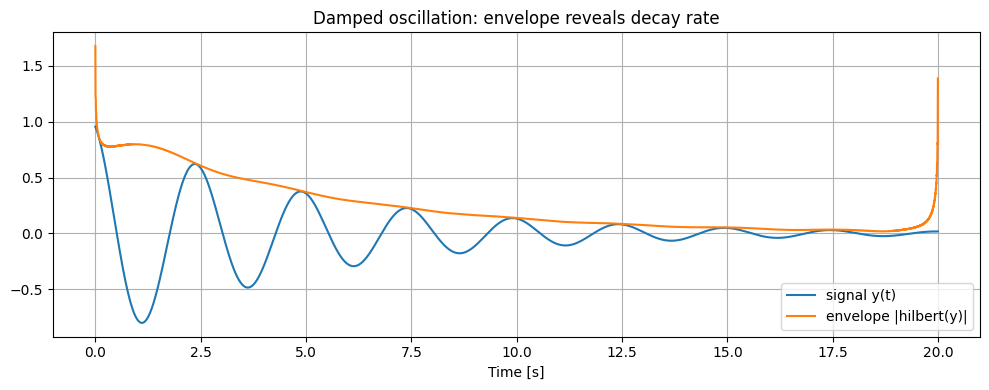

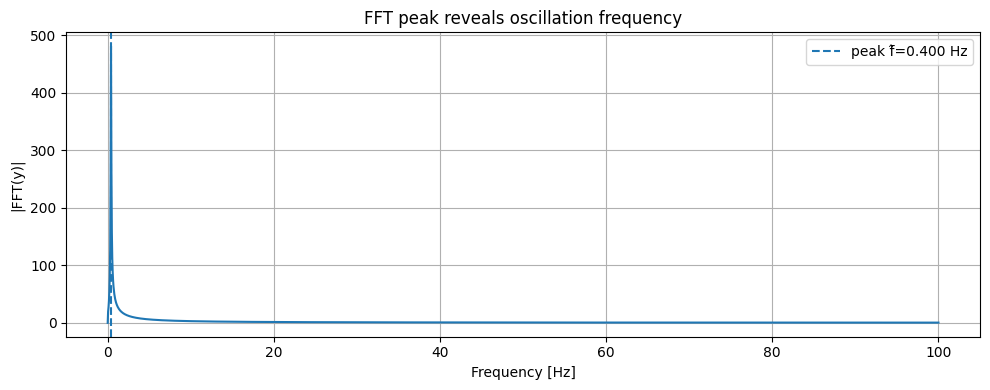

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from numpy.fft import rfft, rfftfreq

# --- demo signal: damped oscillation ---
fs = 200.0                 # sampling rate [Hz]
T  = 20.0                  # duration [s]
t = np.arange(0, T, 1/fs)

sigma_true = -0.2          # decay rate [1/s]
omega_true = 2.5           # rad/s
f_true = omega_true/(2*np.pi)

y = np.exp(sigma_true*t) * np.cos(omega_true*t + 0.3)

# --- frequency estimate via FFT ---
y_d = y - np.mean(y)
Y = np.abs(rfft(y_d))
freqs = rfftfreq(len(t), d=1/fs)

# ignore DC when searching peak
peak_idx = np.argmax(Y[1:]) + 1
f_hat = freqs[peak_idx]
omega_hat = 2*np.pi*f_hat

# --- decay estimate via Hilbert envelope ---
analytic = hilbert(y_d)
env = np.abs(analytic)

# avoid log(0) issues: fit only where envelope is not tiny
mask = env > 0.05*np.max(env)

# linear fit: log(env) = a + sigma*t
coef = np.polyfit(t[mask], np.log(env[mask]), 1)
sigma_hat = coef[0]

print(f"True f = {f_true:.4f} Hz,   Estimated f = {f_hat:.4f} Hz")
print(f"True ω = {omega_true:.4f} rad/s, Estimated ω = {omega_hat:.4f} rad/s")
print(f"True σ = {sigma_true:.4f} 1/s,  Estimated σ = {sigma_hat:.4f} 1/s")

# --- plot ---
plt.figure(figsize=(10,4))
plt.plot(t, y, label="signal y(t)")
plt.plot(t, env, label="envelope |hilbert(y)|")
plt.xlabel("Time [s]")
plt.title("Damped oscillation: envelope reveals decay rate")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(freqs, Y)
plt.axvline(f_hat, linestyle="--", label=f"peak f̂={f_hat:.3f} Hz")
plt.xlabel("Frequency [Hz]")
plt.ylabel("|FFT(y)|")
plt.title("FFT peak reveals oscillation frequency")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()